# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
import warnings
pd.set_option('display.max_rows', None, 'display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('trainhouse.csv')
print(train.shape)

(1460, 81)


# EDA, Preprocessing and Visualization

In [3]:
train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
pd.options.display.max_rows = None
print(100-(train.isnull().sum()*100/len(train)))

Id               100.000000
MSSubClass       100.000000
MSZoning         100.000000
LotFrontage       82.260274
LotArea          100.000000
Street           100.000000
Alley              6.232877
LotShape         100.000000
LandContour      100.000000
Utilities        100.000000
LotConfig        100.000000
LandSlope        100.000000
Neighborhood     100.000000
Condition1       100.000000
Condition2       100.000000
BldgType         100.000000
HouseStyle       100.000000
OverallQual      100.000000
OverallCond      100.000000
YearBuilt        100.000000
YearRemodAdd     100.000000
RoofStyle        100.000000
RoofMatl         100.000000
Exterior1st      100.000000
Exterior2nd      100.000000
MasVnrType        99.452055
MasVnrArea        99.452055
ExterQual        100.000000
ExterCond        100.000000
Foundation       100.000000
BsmtQual          97.465753
BsmtCond          97.465753
BsmtExposure      97.397260
BsmtFinType1      97.465753
BsmtFinSF1       100.000000
BsmtFinType2      97

## Dropping columns with less than 60% entries

In [6]:
train = train.drop(columns= ['Fence'])
train = train.drop(columns = ['MiscFeature'])
train = train.drop(columns = ['PoolQC'])
train = train.drop(columns = ['FireplaceQu'])
train = train.drop(columns = ['Alley'])

In [7]:
#Replacing numerical-label variables with strings/labels

train['MSSubClass'] = train['MSSubClass'].map({20:'1-STORY 1946 & NEWER ALL STYLES'
                                              ,30:'1-STORY 1945 & OLDER',
                                              40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                              45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                              50:'1-1/2 STORY FINISHED ALL AGES',
                                              60:'2-STORY 1946 & NEWER',
                                              70:'2-STORY 1945 & OLDER',
                                              75:'2-1/2 STORY ALL AGES',
                                              80:'SPLIT OR MULTI-LEVEL',
                                              85:'SPLIT FOYER',
                                              90:'DUPLEX - ALL STYLES AND AGES',
                                              120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                              150:'1-1/2 STORY PUD - ALL AGES',
                                              160:'2-STORY PUD - 1946 & NEWER',
                                              180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                              190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

train['MSZoning'] = train['MSZoning'].map({'A':'Agriculture',
                                          'C':'Commercial',
                                          'FV':'Floating Village Residential',
                                          'I':'Industrial',
                                          'RH':'Residential High Density',
                                          'RL':'Residential Low Density',
                                          'RP':'Residential Low Density Park',
                                          'RM':'Residential Medium Density'})


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [9]:
train_num = train.select_dtypes(exclude = 'object')
train_cat = train.select_dtypes(include = 'object')

In [10]:
print(train_num.shape)
print(train_num.head(5))

(1460, 37)
   Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1         65.0     8450            7            5       2003   
1   2         80.0     9600            6            8       1976   
2   3         68.0    11250            7            5       2001   
3   4         60.0     9550            7            5       1915   
4   5         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854      

# Visualizations

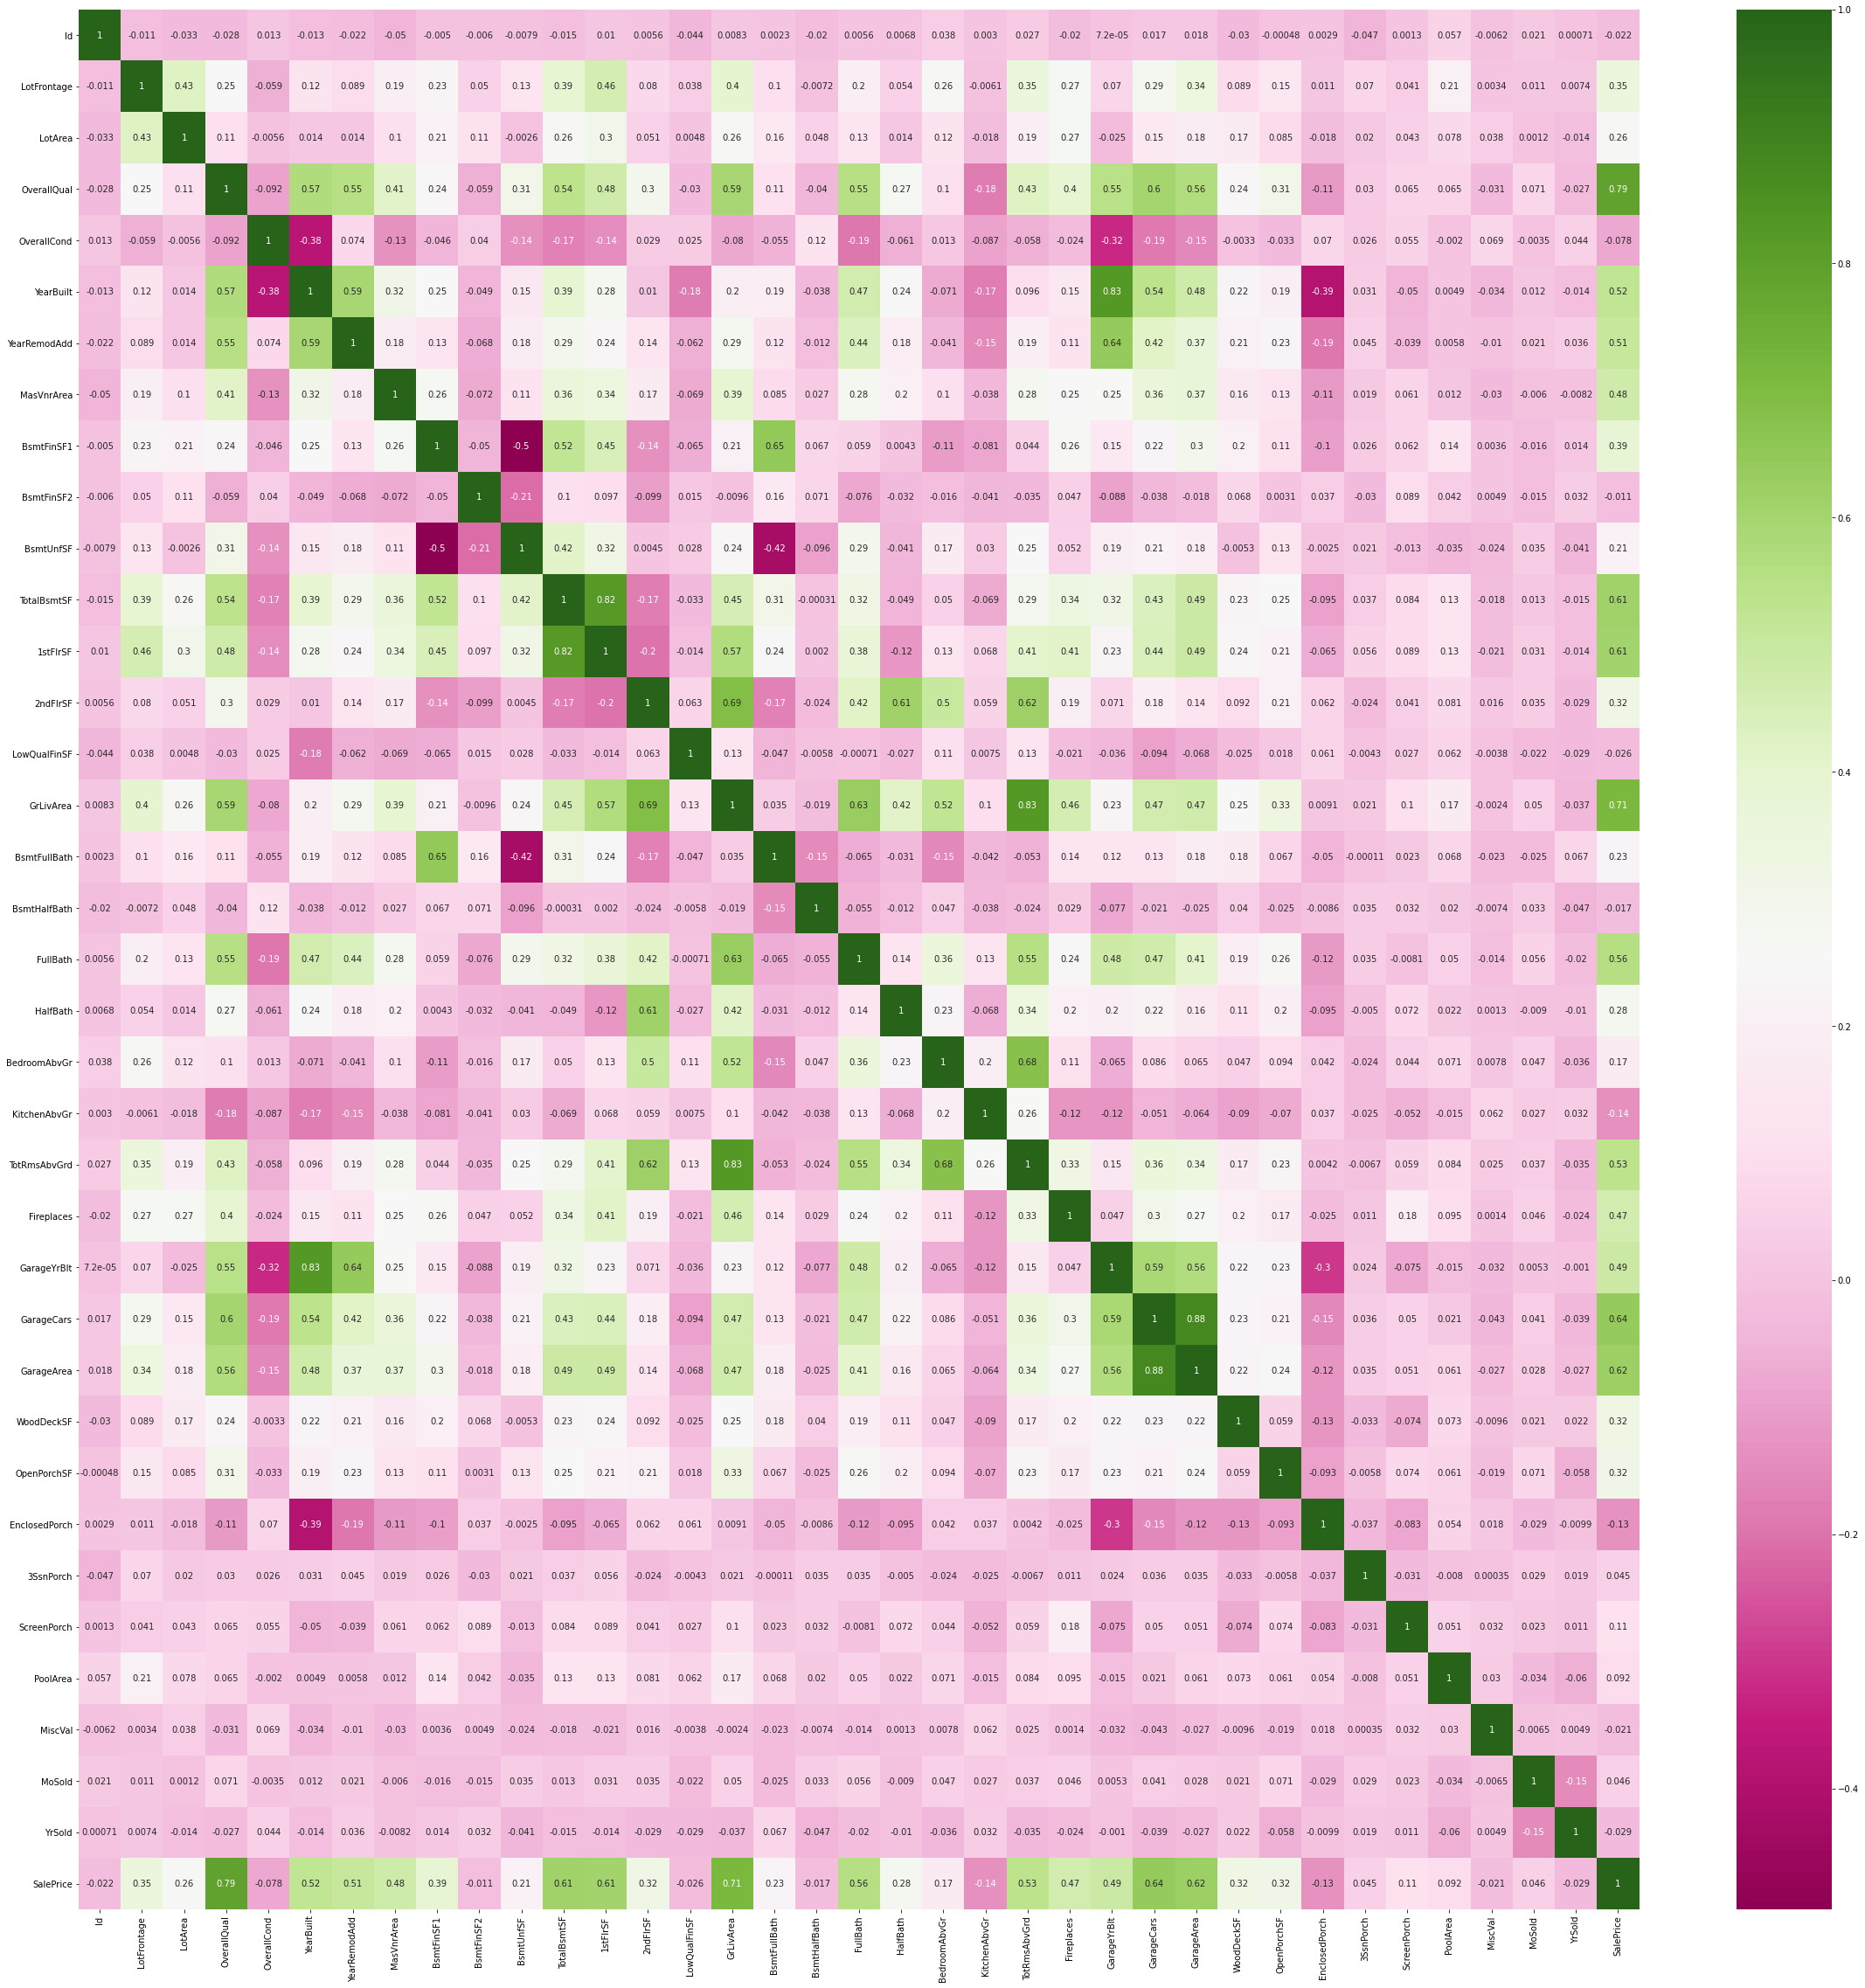

In [11]:
plt.figure(figsize = (40,40))
sns.heatmap(train_num.corr(), annot = True, cmap="PiYG")
plt.show()

In [12]:
#Droping columns which shows high correlation with each other.

train_num = train_num.drop(columns = 'GarageYrBlt')
train_num = train_num.drop(columns = 'TotRmsAbvGrd')
train_num = train_num.drop(columns = '1stFlrSF')
train_num = train_num.drop(columns = 'YearRemodAdd')


In [13]:
train_num.isnull().sum()

Id                 0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [14]:
# filling NaN values in train_num

train_num['LotFrontage'].fillna(train_num['LotFrontage'].median(), inplace = True)
train_num['MasVnrArea'].fillna(train_num['MasVnrArea'].median(), inplace = True)

<Figure size 720x720 with 0 Axes>

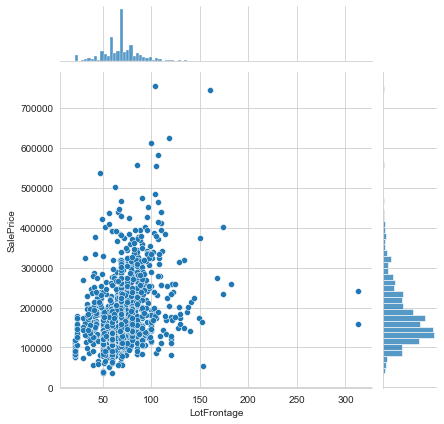

<Figure size 720x720 with 0 Axes>

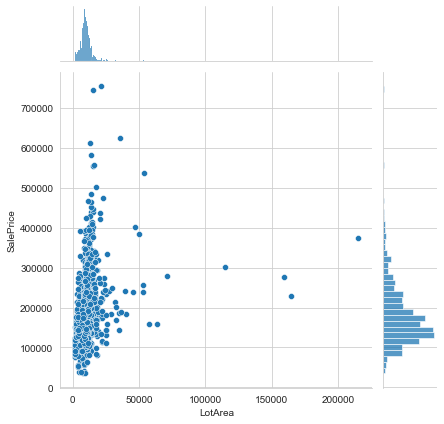

<Figure size 720x720 with 0 Axes>

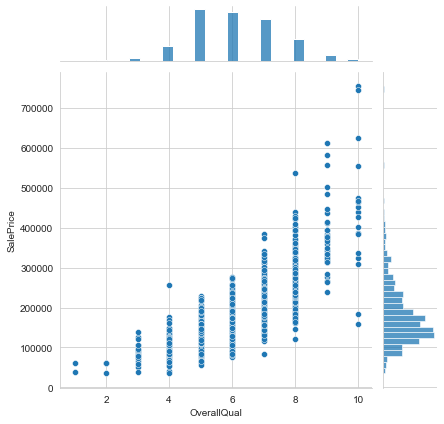

<Figure size 720x720 with 0 Axes>

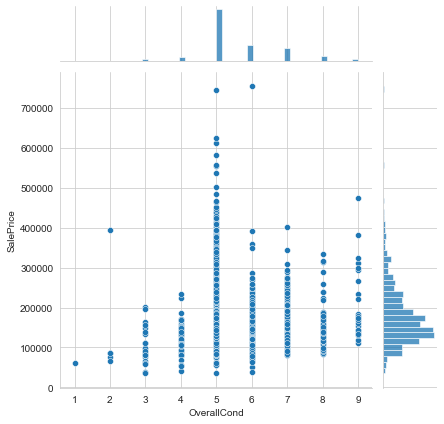

<Figure size 720x720 with 0 Axes>

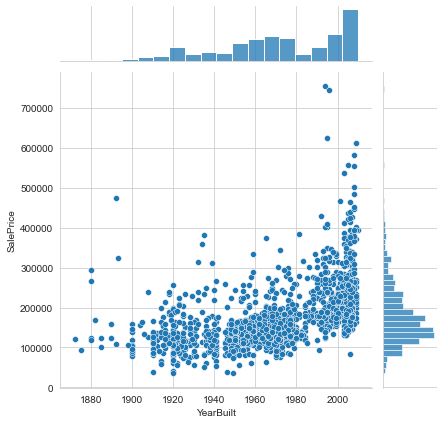

<Figure size 720x720 with 0 Axes>

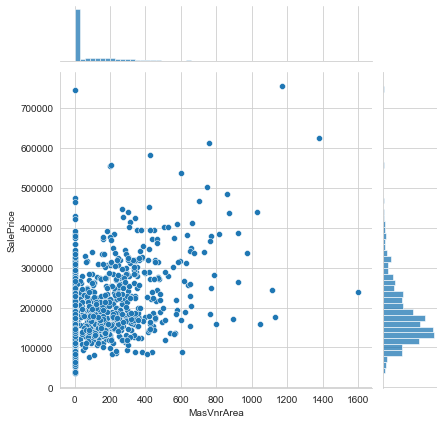

<Figure size 720x720 with 0 Axes>

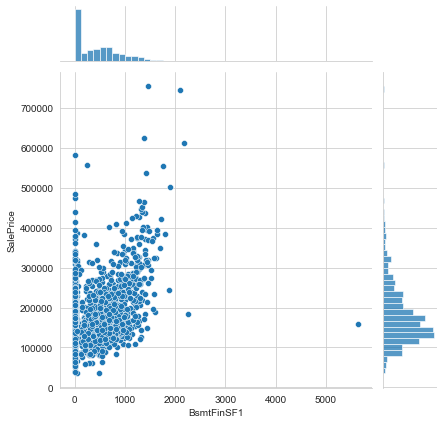

<Figure size 720x720 with 0 Axes>

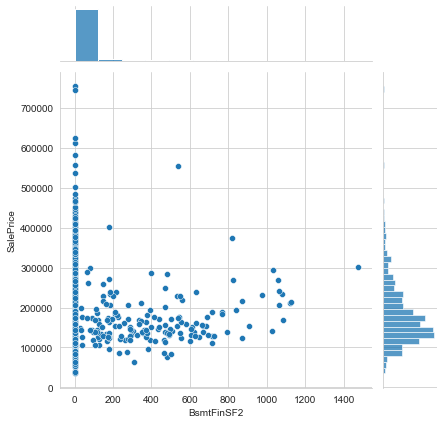

<Figure size 720x720 with 0 Axes>

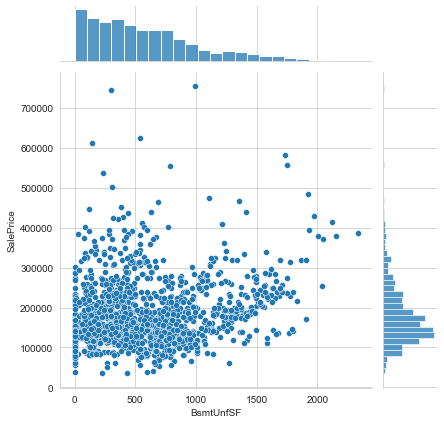

<Figure size 720x720 with 0 Axes>

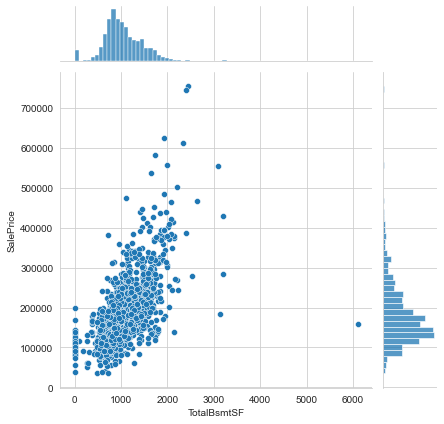

<Figure size 720x720 with 0 Axes>

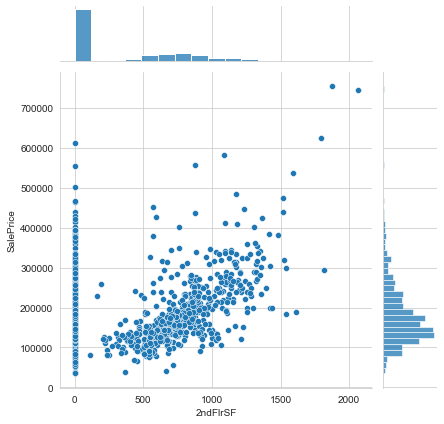

<Figure size 720x720 with 0 Axes>

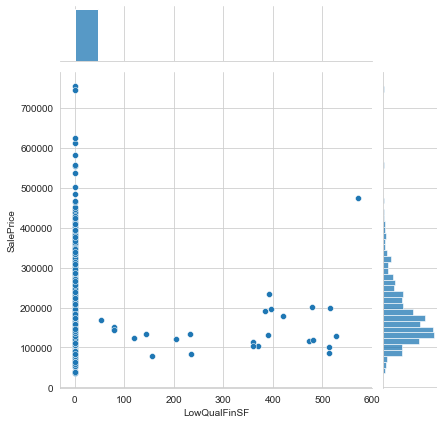

<Figure size 720x720 with 0 Axes>

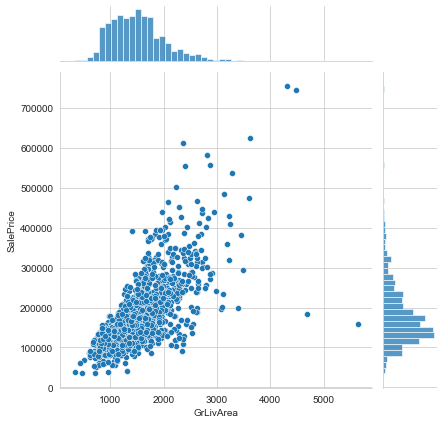

<Figure size 720x720 with 0 Axes>

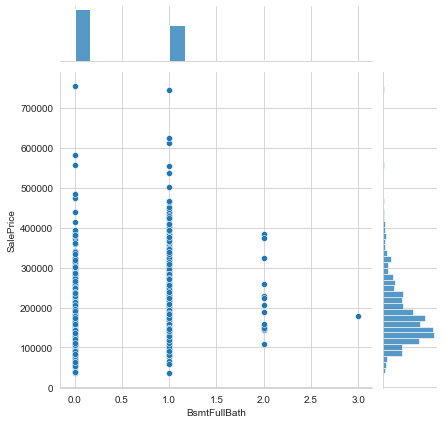

<Figure size 720x720 with 0 Axes>

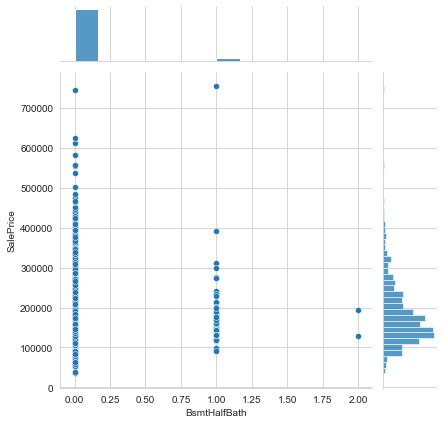

<Figure size 720x720 with 0 Axes>

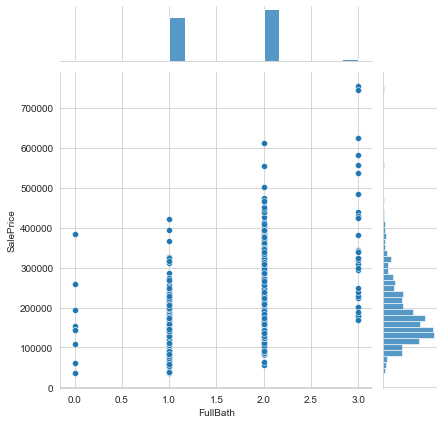

<Figure size 720x720 with 0 Axes>

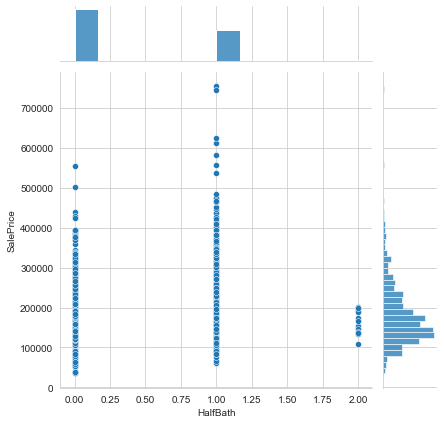

<Figure size 720x720 with 0 Axes>

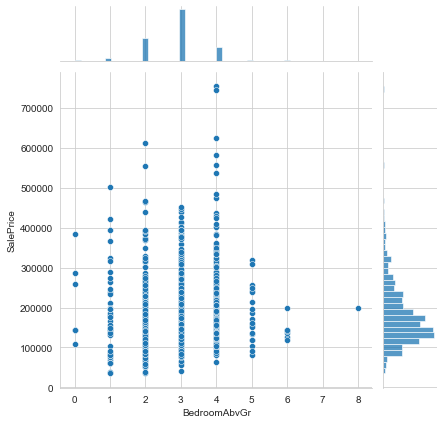

<Figure size 720x720 with 0 Axes>

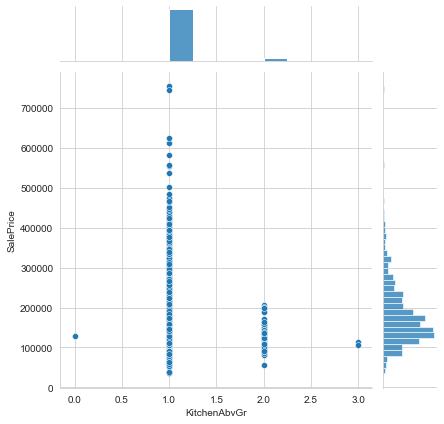

<Figure size 720x720 with 0 Axes>

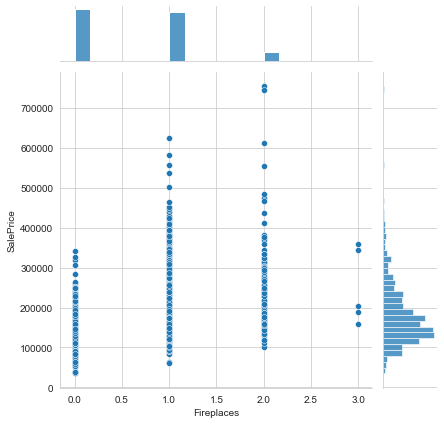

<Figure size 720x720 with 0 Axes>

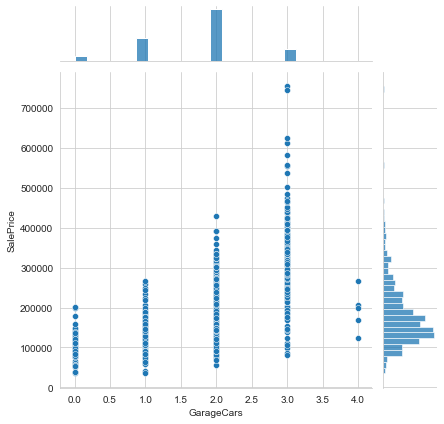

<Figure size 720x720 with 0 Axes>

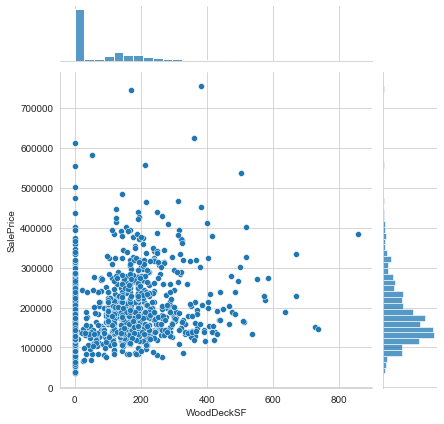

<Figure size 720x720 with 0 Axes>

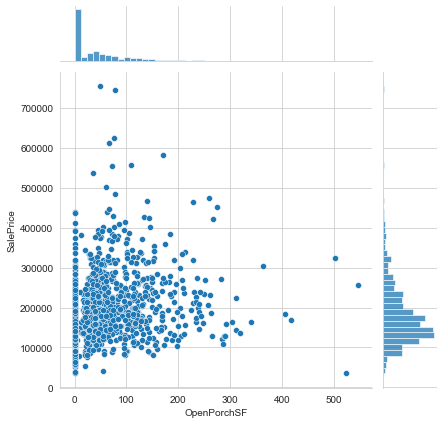

<Figure size 720x720 with 0 Axes>

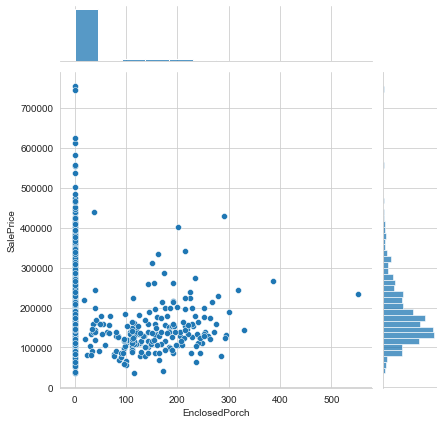

<Figure size 720x720 with 0 Axes>

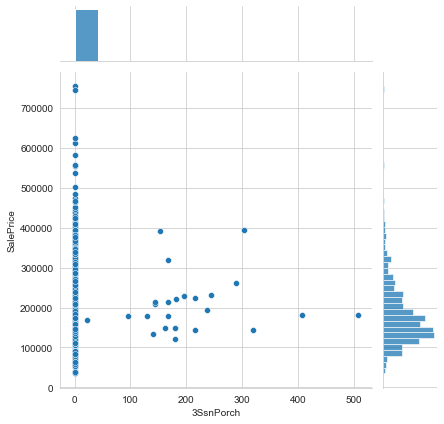

<Figure size 720x720 with 0 Axes>

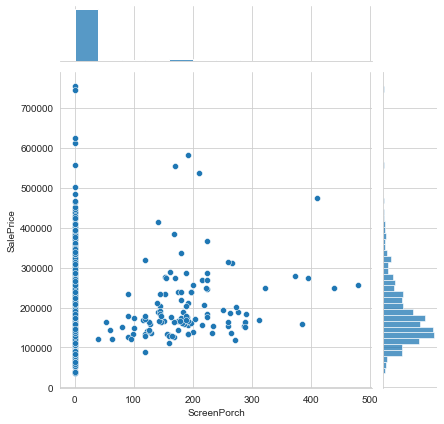

<Figure size 720x720 with 0 Axes>

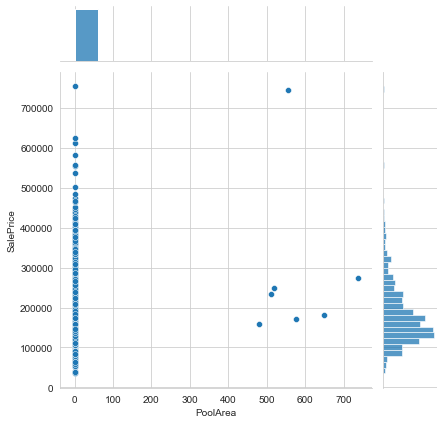

<Figure size 720x720 with 0 Axes>

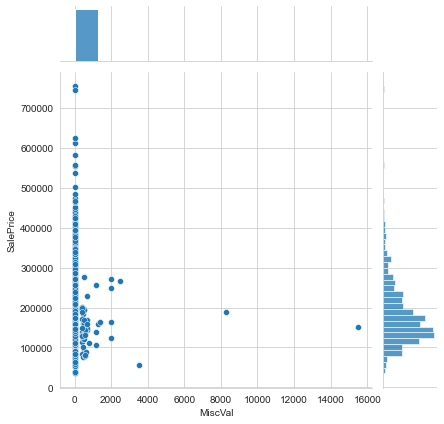

<Figure size 720x720 with 0 Axes>

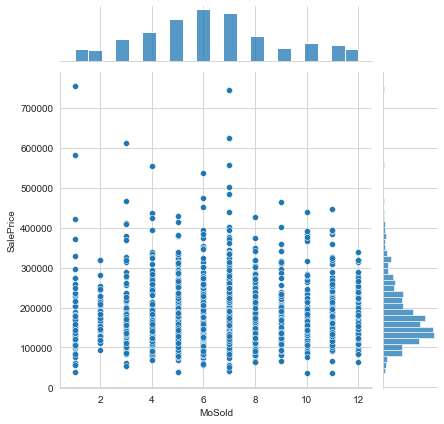

<Figure size 720x720 with 0 Axes>

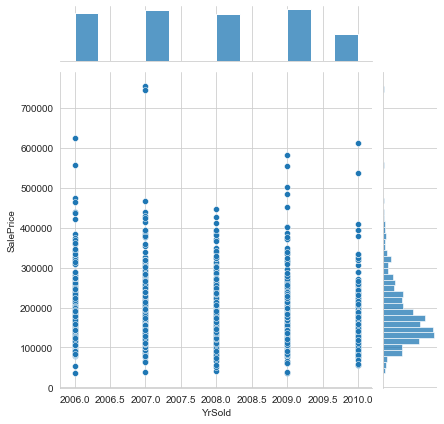

In [15]:
#Visualizing relationship between dependent and independent variables

y = train_num['SalePrice']
features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
            'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
            'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
            'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
            'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
            'MoSold', 'YrSold']

for i in features:
    sns.set_style('whitegrid')
    plt.figure(figsize= (10,10))
    x = train_num[i]
    sns.jointplot(x=x, y=y, data = train_num)

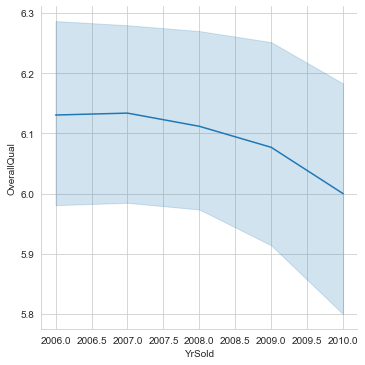

In [16]:
sns.relplot(x = 'YrSold', y = 'OverallQual', kind= 'line', data = train)

In [17]:
train_cat.shape

(1460, 39)

In [18]:
# Label encoding categorical data to check correlation between SalePrice and other variables.

label_cat = train_cat.apply(LabelEncoder().fit_transform)
label_cat['SalePrice'] = train['SalePrice']

correlation_cat = label_cat.corr()
correlation_cat.sort_values(['SalePrice'], ascending = True, inplace = True)
correlation_cat.SalePrice

ExterQual       -0.636884
BsmtQual        -0.620886
KitchenQual     -0.589189
GarageFinish    -0.549247
GarageType      -0.415283
HeatingQC       -0.400178
BsmtExposure    -0.309043
LotShape        -0.255580
MSZoning        -0.251562
BsmtFinType1    -0.103114
Heating         -0.098812
BldgType        -0.085591
LotConfig       -0.067396
SaleType        -0.054911
Utilities       -0.014314
GarageQual       0.006861
Condition2       0.007513
BsmtFinType2     0.008041
BsmtCond         0.015058
LandContour      0.015453
GarageCond       0.025149
MasVnrType       0.029658
Street           0.041036
LandSlope        0.051152
Condition1       0.091155
Exterior1st      0.103551
Exterior2nd      0.103766
Functional       0.115328
ExterCond        0.117303
RoofMatl         0.132383
MSSubClass       0.137325
HouseStyle       0.180163
Neighborhood     0.210851
SaleCondition    0.213092
RoofStyle        0.222405
PavedDrive       0.231357
Electrical       0.234716
CentralAir       0.251328
Foundation  

In [19]:
#Droping features with correlation less than -0.2 or more than 0.2

train_cat = train_cat.drop(columns = 'BsmtCond')
train_cat = train_cat.drop(columns = 'SaleType')
train_cat = train_cat.drop(columns = 'BldgType')
train_cat = train_cat.drop(columns = 'Heating')
train_cat = train_cat.drop(columns = 'Condition1')
train_cat = train_cat.drop(columns = 'MasVnrType')
train_cat = train_cat.drop(columns = 'GarageCond')
train_cat = train_cat.drop(columns = 'BsmtFinType2')
train_cat = train_cat.drop(columns = 'Condition2')
train_cat = train_cat.drop(columns = 'GarageQual')


In [20]:
display(100 - (train_cat.isnull().sum())*100/len(train_cat))

MSSubClass       100.000000
MSZoning          99.315068
Street           100.000000
LotShape         100.000000
LandContour      100.000000
Utilities        100.000000
LotConfig        100.000000
LandSlope        100.000000
Neighborhood     100.000000
HouseStyle       100.000000
RoofStyle        100.000000
RoofMatl         100.000000
Exterior1st      100.000000
Exterior2nd      100.000000
ExterQual        100.000000
ExterCond        100.000000
Foundation       100.000000
BsmtQual          97.465753
BsmtExposure      97.397260
BsmtFinType1      97.465753
HeatingQC        100.000000
CentralAir       100.000000
Electrical        99.931507
KitchenQual      100.000000
Functional       100.000000
GarageType        94.452055
GarageFinish      94.452055
PavedDrive       100.000000
SaleCondition    100.000000
dtype: float64

In [21]:
#Filling empty values with NA

train_cat['BsmtQual'].fillna('NA', inplace = True)
train_cat['BsmtExposure'].fillna('NA', inplace = True)
train_cat['Electrical'].fillna('SBrkr', inplace = True)
train_cat['GarageType'].fillna('NA', inplace = True)
train_cat['GarageFinish'].fillna('NA', inplace = True)
train_cat['BsmtFinType1'].fillna('NA', inplace = True)
train_cat['MSZoning'].fillna('NA', inplace = True)


In [22]:
train_cat.shape

(1460, 29)

In [23]:
# Spliting categorical dataset between nominal and ordinal.

ordinal = train_cat[['LotShape','ExterQual', 'ExterCond','BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
               'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
                'GarageFinish', 'PavedDrive','Street','LandContour','Utilities','LotConfig','LandSlope']]
nominal = train_cat[['MSZoning', 'Neighborhood', 'HouseStyle', 'RoofStyle',
                'RoofMatl', 'Exterior1st', 'Exterior2nd','Foundation','SaleCondition','MSSubClass']]
print(ordinal.shape)
print(nominal.shape)

(1460, 19)
(1460, 10)


In [24]:
# Mapping Ordinal data and assigning positions to them according to their importance.

ordinal['LotShape'] = ordinal['LotShape'].map({'Reg':3,'IR1':2,'IR2':1,'IR3':0})
ordinal['ExterQual'] = ordinal['ExterQual'].map({'Ex':4, 'Gd':3, 'TA':2,'Fa':1,'Po':0})
ordinal['ExterCond'] = ordinal['ExterCond'].map({'Ex':4, 'Gd':3, 'TA':2,'Fa':1,'Po':0})
ordinal['BsmtQual'] = ordinal['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1,'NA':0})
ordinal['BsmtExposure'] = ordinal['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0})
ordinal['BsmtFinType1'] = ordinal['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
ordinal['HeatingQC'] = ordinal['HeatingQC'].map({'Ex':4, 'Gd':3, 'TA':2,'Fa':1,'Po':0})
ordinal['CentralAir'] = ordinal['CentralAir'].map({'Y':1,'N':0})
ordinal['Electrical'] = ordinal['Electrical'].map({'FuseP':0, 'FuseF':1,'FuseA':2,'SBrkr':3,'Mix':4})
ordinal['KitchenQual'] = ordinal['KitchenQual'].map({'Ex':4, 'Gd':3, 'TA':2,'Fa':1,'Po':0})
ordinal['Functional'] = ordinal['Functional'].map({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7})
ordinal['GarageType'] = ordinal['GarageType'].map({'NA':0,'Detchd':1,'CarPort':2,'BuiltIn':3,'Basment':4,'Attchd':5,'2Types':6})
ordinal['GarageFinish'] = ordinal['GarageFinish'].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
ordinal['PavedDrive'] = ordinal['PavedDrive'].map({'N':0,'P':1,'Y':2})
ordinal['Street'] = ordinal['Street'].map({'Grvl':0,'Pave':1})
ordinal['LandContour'] = ordinal['LandContour'].map({'Lvl':3, 'Bnk':2, 'HLS':1,'Low':0})
ordinal['Utilities'] = ordinal['Utilities'].map({'ELO':0, 'NoSeWa':1, 'NoSewr':2, 'AllPub':3})
ordinal['LotConfig'] = ordinal['LotConfig'].map({'CulDSac':0, 'Inside':1, 'Corner':2, 'FR2':3, 'FR3':4})
ordinal['LandSlope'] = ordinal['LandSlope'].map({'Sev':0,'Mod':1,'Gtl':2})


In [25]:
ordinal.shape

(1460, 19)

In [26]:
# For nominal-categorical features, creating dummies.
# It increases number of columns significantly.

nominal = pd.get_dummies(nominal)
print(nominal.shape)

(1460, 110)


In [27]:
# Combining categorical data together

train_cat_f = ordinal.join(nominal)
train_cat_f.shape

(1460, 129)

In [28]:
# Joining numerical and categorical data

train_final = train_cat_f.join(train_num)
train_final.shape

(1460, 162)

## Standardizing 

In [29]:
#Standardizing the dataset to make it consistent.

array = train_final.values
# separate array into input and output components
Xa = array[:,0:-1]
Y = array[:,-1]
scaler = StandardScaler().fit(Xa)
X = scaler.transform(Xa)
# summarize transformed data
set_printoptions(precision=3)
pd.options.display.max_rows = None
pd.options.display.max_columns = None
print(X)


[[ 0.701  1.052 -0.238 ... -0.088 -1.599  0.139]
 [ 0.701 -0.69  -0.238 ... -0.088 -0.489 -0.614]
 [-1.017  1.052 -0.238 ... -0.088  0.991  0.139]
 ...
 [ 0.701  2.794  2.611 ...  4.953 -0.489  1.645]
 [ 0.701 -0.69  -0.238 ... -0.088 -0.859  1.645]
 [ 0.701  1.052 -0.238 ... -0.088 -0.119  0.139]]


## Spliting Train_Dataset into train and test

In [30]:
# Spliting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size = 0.3, random_state = 1)

# Advanced Regression Models

In [31]:
# Random Forest Regresion

model1 = RandomForestRegressor()
model1.fit(X_train,y_train)

predict1 = model1.predict(X_test)
results1 = model1.score(X_test,y_test)
print(results1)
accuracies = cross_val_score(estimator = model1, X = X_test, y = y_test, cv = 5)
print(("Accuracy: %.3f%% ") % (accuracies.mean()*100.0))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(mean_absolute_error(y_test,predict1))
print(mean_squared_error(y_test,predict1))
print(np.sqrt(mean_squared_error(y_test,predict1)))

0.9056881370329887
Accuracy: 88.383% 
Standard Deviation: 3.06 %
17093.965388127857
673415261.3550912
25950.245882362873


In [32]:
# Regression model = Lasso

model2 = Lasso(alpha =1.0)
model2.fit(X_train,y_train)

predict2 = model2.predict(X_test)
results2 = model2.score(X_test,y_test)
print(results2)
accuracies1 = cross_val_score(estimator = model2, X = X_test, y = y_test, cv = 5)
print(("Accuracy: %.3f%% ") % (accuracies1.mean()*100.0))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))
print(mean_absolute_error(y_test,predict2))
print(mean_squared_error(y_test,predict2))
print(np.sqrt(mean_squared_error(y_test,predict2)))

0.8716162645234395
Accuracy: 83.788% 
Standard Deviation: 2.91 %
19703.554251386857
916698748.8088485
30277.033355479998


In [33]:
# Regression model = Ridge

model3 = Ridge(alpha = 1.0)
model3.fit(X_train,y_train)

predict3 = model3.predict(X_test)
results3 = model3.score(X_test,y_test)
print(results3)
accuracies3 = cross_val_score(estimator = model3, X = X_test, y = y_test, cv =5)
print(("Accuracy: %.3f%% ") % (accuracies3.mean()*100.0))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))
print(mean_absolute_error(y_test,predict3))
print(mean_squared_error(y_test,predict3))
print(np.sqrt(mean_squared_error(y_test,predict3)))

0.8715945040146809
Accuracy: 84.051% 
Standard Deviation: 3.05 %
19708.05225540053
916854125.4309608
30279.59916232315


# Inferences:

1) Overall quality of the houses decreased with YearSold.

2) Houses made after year 2000 has requirements with quality 5+ out of 10.

3) More the area of living room, basement, 1st floor and kitchen, higher the price.

4) House with Overall quality and overall condition betweeen 5 to 8, garage space of 2 cars, all utilities, suitable for 1 family, paved street, regular plot, good kitchen and basement will cost between 1,50,000 to 2,00,000.

5) Probability of finding a house with above requirements is approx 0.5% (according to data).

